Load required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

plt.style.use('seaborn-white')
%matplotlib inline

Some plotting functions to help you plot the ROC curve

In [52]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for house price > 200,000', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')


Load the Sacramento housing data

In [16]:
sac = pd.read_csv('datasets/Sacramentorealestatetransactions.csv')
sac

street             city    zip state  beds  \
0                       3526 HIGH ST       SACRAMENTO  95838    CA     2   
1                        51 OMAHA CT       SACRAMENTO  95823    CA     3   
2                     2796 BRANCH ST       SACRAMENTO  95815    CA     2   
3                   2805 JANETTE WAY       SACRAMENTO  95815    CA     2   
4                    6001 MCMAHON DR       SACRAMENTO  95824    CA     2   
5                 5828 PEPPERMILL CT       SACRAMENTO  95841    CA     3   
6                6048 OGDEN NASH WAY       SACRAMENTO  95842    CA     3   
7                      2561 19TH AVE       SACRAMENTO  95820    CA     3   
8    11150 TRINITY RIVER DR Unit 114   RANCHO CORDOVA  95670    CA     2   
9                       7325 10TH ST        RIO LINDA  95673    CA     3   
10                  645 MORRISON AVE       SACRAMENTO  95838    CA     3   
11                     4085 FAWN CIR       SACRAMENTO  95823    CA     3   
12                   2930 LA ROSA RD       SACRAMENTO  95815    CA     1   
13                     2113 KIRK WAY       SACRAMENTO  95822    CA     3   
14               4533 LOCH HAVEN WAY       SACRAMENTO  95842    CA     2   
15                    7340 HAMDEN PL       SACRAMENTO  95842    CA     2   
16                       6715 6TH ST        RIO LINDA  95673    CA     2   
17           6236 LONGFORD DR Unit 1   CITRUS HEIGHTS  95621    CA     2   
18                   250 PERALTA AVE       SACRAMENTO  95833    CA     2   
19                   113 LEEWILL AVE        RIO LINDA  95673    CA     3   
20                6118 STONEHAND AVE   CITRUS HEIGHTS  95621    CA     3   
21                 4882 BANDALIN WAY       SACRAMENTO  95823    CA     4   
22                   7511 OAKVALE CT  NORTH HIGHLANDS  95660    CA     4   
23                      9 PASTURE CT       SACRAMENTO  95834    CA     3   
24                3729 BAINBRIDGE DR  NORTH HIGHLANDS  95660    CA     3   
25                3828 BLACKFOOT WAY         ANTELOPE  95843    CA     3   
26                   4108 NORTON WAY       SACRAMENTO  95820    CA     3   
27                  1469 JANRICK AVE       SACRAMENTO  95832    CA     3   
28                     9861 CULP WAY       SACRAMENTO  95827    CA     4   
29             7825 CREEK VALLEY CIR       SACRAMENTO  95828    CA     3   
..                               ...              ...    ...   ...   ...   
955                  2100 BEATTY WAY        ROSEVILLE  95747    CA     3   
956              6920 GILLINGHAM WAY  NORTH HIGHLANDS  95660    CA     3   
957                 82 WILDFLOWER DR             GALT  95632    CA     3   
958                  8652 BANTON CIR        ELK GROVE  95624    CA     4   
959              8428 MISTY PASS WAY         ANTELOPE  95843    CA     3   
960                7958 ROSEVIEW WAY       SACRAMENTO  95828    CA     3   
961                    9020 LUKEN CT        ELK GROVE  95624    CA     3   
962              7809 VALLECITOS WAY       SACRAMENTO  95828    CA     3   
963               8445 OLD AUBURN RD   CITRUS HEIGHTS  95610    CA     3   
964                  10085 ATKINS DR        ELK GROVE  95757    CA     3   
965              9185 CERROLINDA CIR        ELK GROVE  95758    CA     3   
966                 9197 CORTINA CIR        ROSEVILLE  95678    CA     3   
967                  5429 HESPER WAY       CARMICHAEL  95608    CA     4   
968                 1178 WARMWOOD CT             GALT  95632    CA     4   
969                    4900 ELUDE CT       SACRAMENTO  95842    CA     4   
970                    3557 SODA WAY       SACRAMENTO  95834    CA     0   
971             3528 SAINT GEORGE DR       SACRAMENTO  95821    CA     3   
972                7381 WASHBURN WAY  NORTH HIGHLANDS  95660    CA     3   
973             2181 WINTERHAVEN CIR     CAMERON PARK  95682    CA     3   
974                 7540 HICKORY AVE       ORANGEVALE  95662    CA     3   
975              5024 CHAMBERLIN CIR        ELK GROVE  95757    CA     3   
97

Create a binary variable where 1 indicates a house sold for over 200,000 and 0 indicates a house sold for equal to or less than 200,000.

Subset the data to just contain the number of beds, baths, the sq ft, and the over 200k indicator variable.

In [25]:
sac['var'] = sac['price'].apply(lambda x: int(x > 200000))
X = sac[['beds','baths','sq__ft']]
y = sac['var']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Split your data into training and testing sets. The predictors are the beds, baths, and sq ft. The feature is the over 200k class variable. Make the test size 33% (and optionally stratify by the over 200k class).

Fit a logistic regression on the training data.

Print out the confusion matrix

In [32]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['over_200k', 'under_200k'],
                         columns=['predicted_over_200k','predicted_under_200k'])
confusion
#print(confusion)

predicted_over_200k  predicted_under_200k
over_200k                   139                    47
under_200k                   77                    63

Calculate the accuracy, precision, and recall. What can these three metrics tell you about your model?

In [51]:
tot = (np.sum(np.sum(confusion)))
true = confusion.ix[0,0]+confusion.ix[1,1]
acc = true/float(tot)
acc

0.61963190184049077

Say as a real estate agent, I prioritize minimizing false positives (predicting a house will sell for over 200k when it actually sells for under) because false positives make me lose money.

Change the decision threshold to **lower the false positive rate** and then print out the new confusion matrix. What is the downside to lowering the false positive rate?

In [77]:
thresh = 0.75
probs = pd.Series(logreg.predict_proba(X_test)[:,1])
y_pred2 = probs.apply(lambda x: int(x>thresh))
confusion2 = np.array(confusion_matrix(y_test, y_pred2, labels=[1,0]))
pd.DataFrame(confusion2)

0    1
0  41  145
1   1  139

Plot the ROC curve using the plotting function provided.

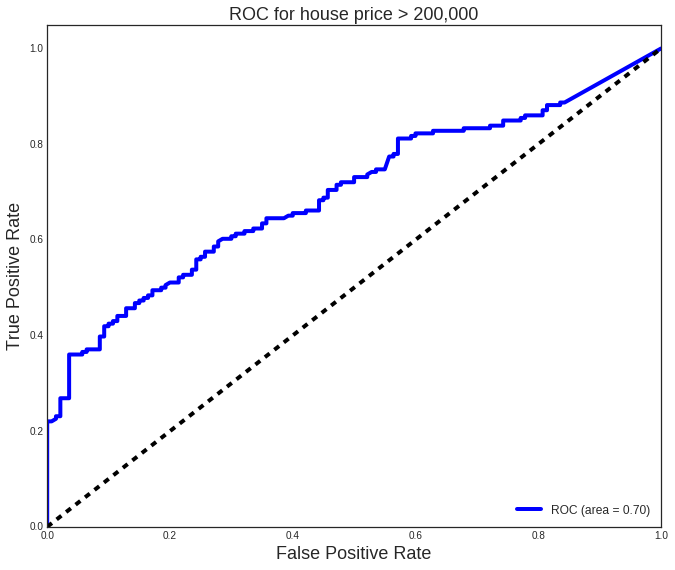

In [53]:
y_score = logreg.decision_function(X_test)
plot_roc(y_test, y_score)

In [76]:
probsd = logreg.predict_proba(X_test)
map((lambda x: (x - probsd.mean())/probsd.std()),probsd[:,1])

[-0.59542870196053588,
 2.1400479402397106,
 0.7787820434585816,
 1.4125927372339062,
 0.56683414316435299,
 -1.4616129975686805,
 0.11024632214599529,
 0.44040086096572467,
 -1.4616129975686805,
 -1.4616129975686805,
 -0.81355770395591365,
 -1.4616129975686805,
 0.3728224210317525,
 0.93453217637110564,
 -0.80119538979226912,
 0.59600590775031725,
 -0.6499762484055438,
 -0.64948688997565862,
 -1.4616129975686805,
 1.8576347288061243,
 0.40511633218047077,
 0.48464282328315533,
 0.95337073739961209,
 0.43594348764213431,
 0.39002910506047328,
 0.61472933638452221,
 1.4904714035715929,
 0.66479178427458063,
 0.28634395349263247,
 0.71914468084166083,
 0.43795682387742879,
 1.4563268165378058,
 0.55592598865973042,
 0.56435644948951313,
 -1.4616129975686805,
 -0.76967508237590043,
 0.53463041435764047,
 0.60340294853569654,
 0.63494189901074738,
 -1.4616129975686805,
 1.5244473137427121,
 -0.73981914456448838,
 -1.4616129975686805,
 1.6254996849514252,
 1.4563268165378058,
 0.30265212885

In [74]:
y_score

array([-0.41382223,  1.87136103,  0.54689382,  1.05635804,  0.3934188 ,
       -1.10070246,  0.07558199,  0.30410581, -1.10070246, -1.10070246,
       -0.57264   , -1.10070246,  0.25687896,  0.66372421, -0.56346678,
        0.41423495, -0.45298482, -0.452632  , -1.10070246,  1.50443452,
        0.27940868,  0.33520414,  0.67814141,  0.30098098,  0.26887471,
        0.42764197,  1.12727408,  0.46367972,  0.19684971,  0.50314462,
        0.30239224,  1.09587345,  0.38565685,  0.39165472, -1.10070246,
       -0.54018091,  0.37053627,  0.4195272 ,  0.44215794, -1.10070246,
        1.15902753, -0.5182558 , -1.10070246,  1.2567576 ,  1.09587345,
        0.20813983,  0.35213932,  1.34249192, -0.50137114,  1.71995465,
        0.36872167,  0.2949831 ,  0.39906386,  0.29563823, -1.10070246,
       -0.56523086,  0.03137895,  0.28228172,  0.25829023, -1.10070246,
        1.33820761, -0.24441998,  0.14463293,  0.40753145,  0.39548519,
       -0.42017292, -0.41493119,  0.23883483,  0.54271053,  0.27

Bonus: when might precision and recall be more useful than the ROC?

Precision and recall are more useful when the proportion of the positive class is smaller, since they are sensitive to this.